In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#imporamos todas las liberias a usar

In [3]:
basedat= pd.read_csv(r"C:\Users\alexd\OneDrive\Escritorio\trabajo de proga\positivos_covid.csv", sep = (';'))
#cargamos la base de datos desde la ruta en la que lo tenemos

In [4]:
basedat.head(4)
#hacemos una vista previa a la base de datos y todas sus variables

,FECHA_CORTE,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO,UBIGEO,id_persona
0,20241203,TUMBES,TUMBES,TUMBES,AG,46.0,FEMENINO,20221207.0,240101.0,203499.0
1,20241203,LIMA,LIMA,JESUS MARIA,AG,69.0,FEMENINO,20230822.0,150113.0,221397.0
2,20241203,SAN MARTIN,MOYOBAMBA,MOYOBAMBA,AG,55.0,FEMENINO,20240108.0,220101.0,295651.0
3,20241203,AREQUIPA,CAYLLOMA,COPORAQUE,AG,50.0,MASCULINO,20230824.0,40506.0,851625.0


In [5]:
basedat.dtypes
#observamos el tipo de datos de cada variable de la base de datos

FECHA_CORTE          int64
DEPARTAMENTO        object
PROVINCIA           object
DISTRITO            object
METODODX            object
EDAD               float64
SEXO                object
FECHA_RESULTADO    float64
UBIGEO             float64
id_persona         float64
dtype: object

In [6]:
basedat.describe()
#hacemos analisis estadisticos sobre la base de datos para entender de como van las variables

,FECHA_CORTE,EDAD,FECHA_RESULTADO,UBIGEO,id_persona
count,4585360.0,4.585007e+06,4.583337e+06,4.348706e+06,1.236900e+04
mean,20241203.0,4.079146e+01,2.021343e+07,1.298254e+05,1.475524e+07
std,0.0,1.771647e+01,1.413774e+04,5.324980e+04,1.031654e+07
min,20241203.0,0.000000e+00,1.899123e+07,1.010100e+04,2.130000e+03
25%,20241203.0,2.800000e+01,2.021013e+07,1.001020e+05,5.549763e+06
50%,20241203.0,3.900000e+01,2.021122e+07,1.501100e+05,1.309273e+07
75%,20241203.0,5.300000e+01,2.022021e+07,1.501350e+05,2.245342e+07
max,20241203.0,1.250000e+02,2.024030e+07,2.504010e+05,4.200754e+07


In [7]:
print(basedat.shape)
#observamos los parametros de filas y columnas

(4585360, 10)


In [9]:
basedat.isnull().sum()
#identificamos los valores nulos en la base de datos para empezar a limpiarla

FECHA_CORTE              0
DEPARTAMENTO             0
PROVINCIA                0
DISTRITO                 0
METODODX                 0
EDAD                   353
SEXO                     0
FECHA_RESULTADO       2023
UBIGEO              236654
id_persona         4572991
dtype: int64

In [10]:
basedat.drop(columns = ['id_persona','UBIGEO','FECHA_RESULTADO'],inplace =True)
#elminamos esas variables por la falta de datos que hay en la base de datos e inrelevancia para nuestro objetivos planteados

In [11]:
basedat.drop(columns = ['FECHA_CORTE'],inplace =True)
#dato inrelevante

In [12]:
basedat.dropna(inplace=True)
#eliminamos todas las filas que presentan datos nulos

In [13]:
variables =['DEPARTAMENTO','PROVINCIA','DISTRITO','METODODX','EDAD','SEXO'] 
for sub in variables:
    print(f'columna {sub}:{basedat[sub].nunique()} subniveles')
    #identificamos cuantos subinel tiene cada variable

columna DEPARTAMENTO:25 subniveles
columna PROVINCIA:197 subniveles
columna DISTRITO:1705 subniveles
columna METODODX:3 subniveles
columna EDAD:123 subniveles
columna SEXO:2 subniveles


In [14]:
edad =basedat[basedat['EDAD']%1 != 0]
edad.head(20)
#vemos si hay edades con decimales

,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO


In [15]:
 basedat = basedat[basedat['PROVINCIA']!='EN INVESTIGACIÓN']
#eliminamos los valores de PROVINCIA que no son validos

In [16]:
 basedat = basedat[basedat['DISTRITO']!='EN INVESTIGACIÓN']
#eliminamos los valores de DISTRITO que no son validos

In [17]:
variables =['DEPARTAMENTO','PROVINCIA','DISTRITO','METODODX','EDAD','SEXO'] 
for sub in variables:
    print(f'columna {sub}:{basedat[sub].nunique()} subniveles')
    #observamos si hay alguna anomalia en los subniveles

columna DEPARTAMENTO:25 subniveles
columna PROVINCIA:196 subniveles
columna DISTRITO:1704 subniveles
columna METODODX:3 subniveles
columna EDAD:123 subniveles
columna SEXO:2 subniveles


In [18]:
edad =basedat[basedat['EDAD']>120]
edad.head(10)
#observamos que hay personas con mas de 120 años de edad, no lo descartamos por que son minimas y posibles

,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO
512055,LIMA,LIMA,MAGDALENA DEL MAR,PCR,125.0,MASCULINO
579990,LIMA,LIMA,LIMA,PCR,121.0,MASCULINO
1086765,LIMA,LIMA,LIMA,PCR,121.0,MASCULINO
1789550,LIMA,LIMA,LIMA,PCR,121.0,FEMENINO
2152069,LIMA,LIMA,LIMA,PCR,121.0,FEMENINO
2325280,LIMA,LIMA,LIMA,AG,122.0,FEMENINO
2533340,LIMA,LIMA,LIMA,AG,122.0,FEMENINO
2758496,LIMA,LIMA,LIMA,PCR,121.0,MASCULINO
3530901,LIMA,LIMA,LIMA,PCR,122.0,FEMENINO
3779320,LIMA,LIMA,LIMA,PCR,122.0,FEMENINO


In [19]:
basedat
#analisamos la base de datos limpia y empezamos con las graficas

,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO
0,TUMBES,TUMBES,TUMBES,AG,46.0,FEMENINO
1,LIMA,LIMA,JESUS MARIA,AG,69.0,FEMENINO
2,SAN MARTIN,MOYOBAMBA,MOYOBAMBA,AG,55.0,FEMENINO
3,AREQUIPA,CAYLLOMA,COPORAQUE,AG,50.0,MASCULINO
4,LIMA,LIMA,JESUS MARIA,AG,58.0,MASCULINO
...,...,...,...,...,...,...
4585355,LIMA,LIMA,JESUS MARIA,AG,21.0,MASCULINO
4585356,LIMA,LIMA,EL AGUSTINO,AG,22.0,MASCULINO
4585357,LIMA,LIMA,ATE,AG,22.0,MASCULINO
4585358,LIMA,LIMA,SAN MARTIN DE PORRES,AG,22.0,MASCULINO


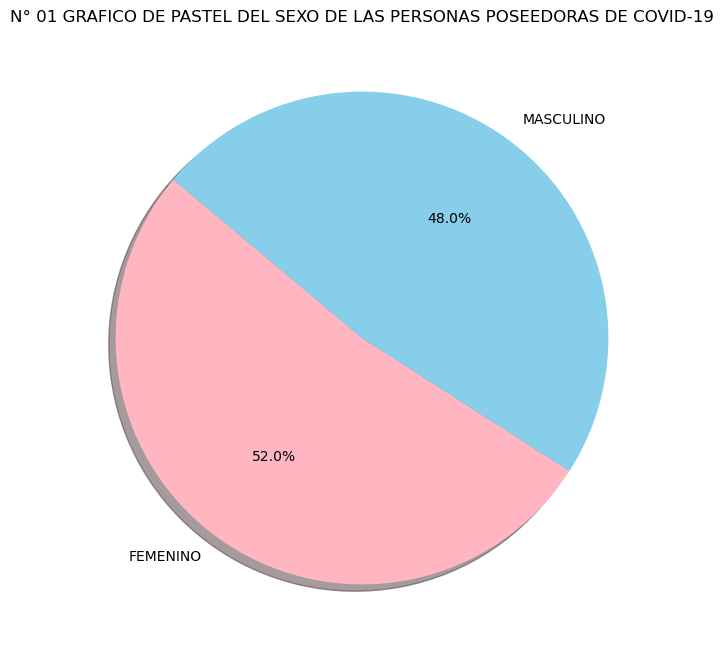

In [20]:
distribucion_sexo = basedat['SEXO'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(distribucion_sexo, 
        labels=distribucion_sexo.index, 
        autopct='%1.1f%%', 
        colors=['lightpink','skyblue'], 
        startangle=140,
        shadow=True)
plt.title('N° 01 GRAFICO DE PASTEL DEL SEXO DE LAS PERSONAS POSEEDORAS DE COVID-19')
plt.show()


In [38]:
basedat['EDAD'].describe()
#analisis de estadistico de la variable cuantitativa discreta

count    4.348363e+06
mean     4.074014e+01
std      1.771112e+01
min      0.000000e+00
25%      2.800000e+01
50%      3.900000e+01
75%      5.300000e+01
max      1.250000e+02
Name: EDAD, dtype: float64

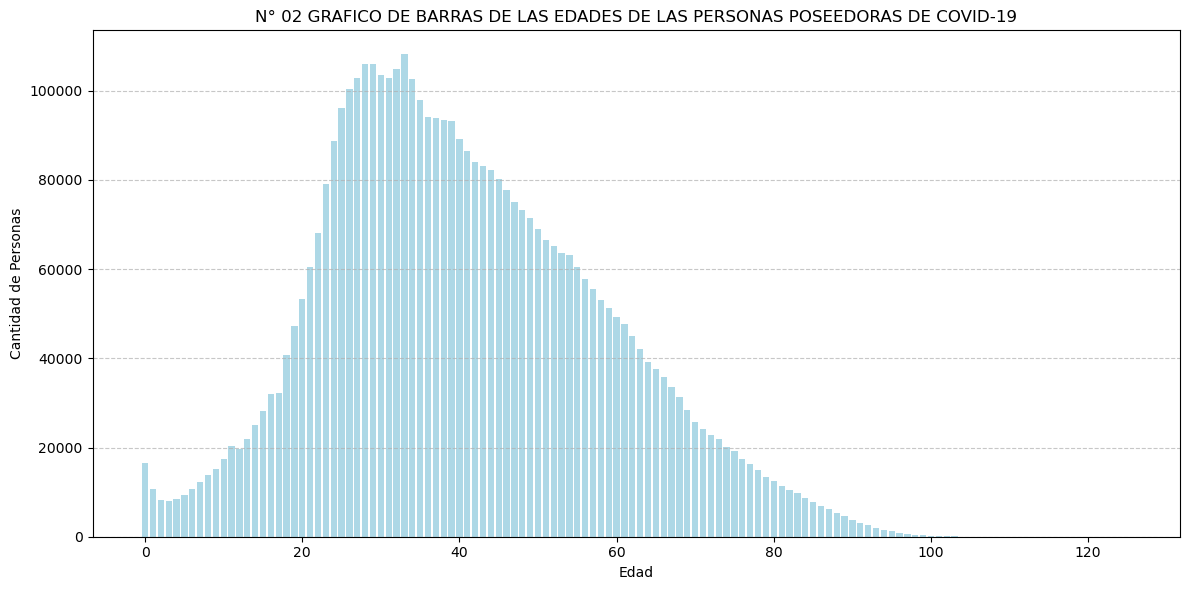

In [40]:
edades_conteo = basedat['EDAD'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.bar(edades_conteo.index, edades_conteo.values, color='lightblue')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Personas')
plt.title('N° 02 GRAFICO DE BARRAS DE LAS EDADES DE LAS PERSONAS POSEEDORAS DE COVID-19')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [41]:
pip install geopandas
#intalamos geopandas para poder utilizar el mapa de calor

SyntaxError: invalid syntax (2848610063.py, line 1)

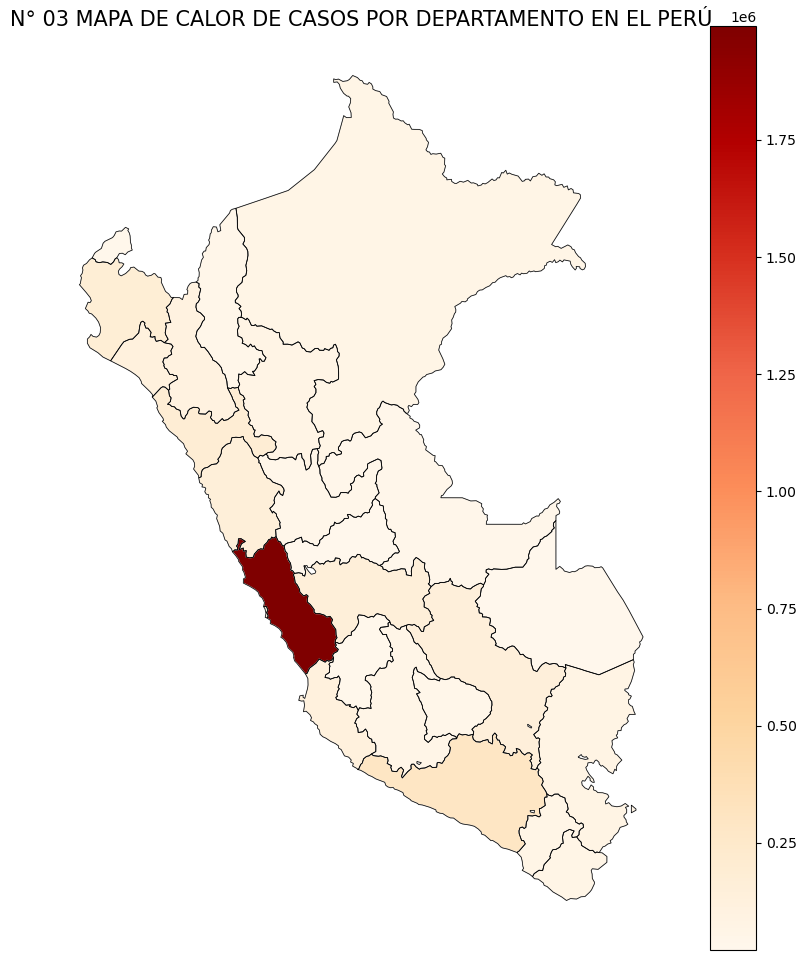

In [60]:
import geopandas as gpd

conteo_departamento = basedat['DEPARTAMENTO'].value_counts().reset_index()
conteo_departamento.columns = ['DEPARTAMENTO', 'CASOS']

mapa_peru = gpd.read_file('https://github.com/juaneladio/peru-geojson/raw/master/peru_departamental_simple.geojson')

mapa_peru['NOMBDEP'] = mapa_peru['NOMBDEP'].str.upper()

mapa_completo = mapa_peru.merge(conteo_departamento, left_on='NOMBDEP', right_on='DEPARTAMENTO')

fig, ax = plt.subplots(1, 1, figsize=(10, 12))
mapa_peru.boundary.plot(ax=ax, color='black', linewidth=0.5)
mapa_completo.plot(column='CASOS', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.set_title('N° 03 MAPA DE CALOR DE CASOS POR DEPARTAMENTO EN EL PERÚ', fontsize=15)
ax.axis('off')

plt.show()


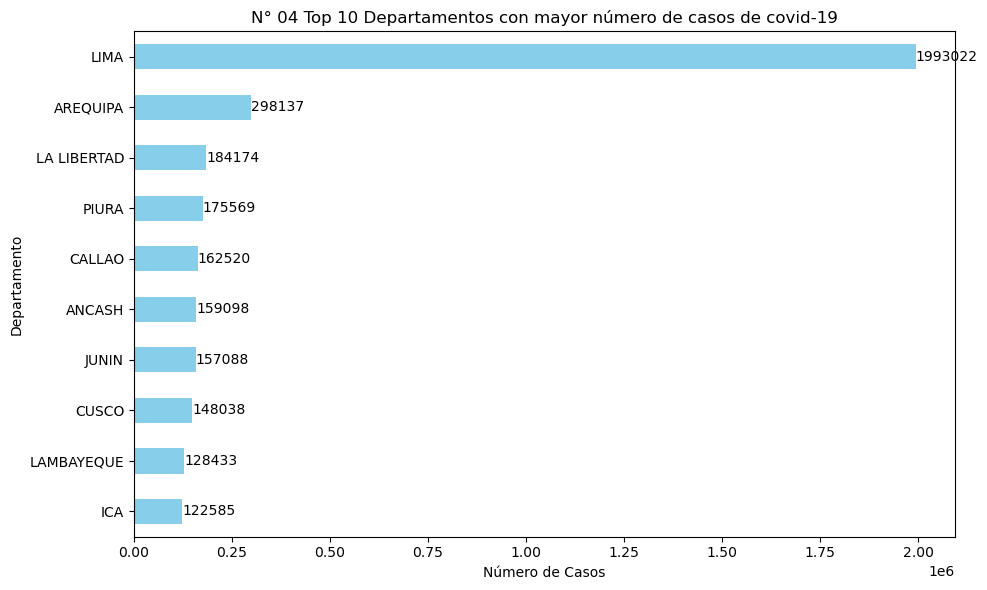

In [44]:
top_departamentos = basedat['DEPARTAMENTO'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_departamentos.sort_values().plot(kind='barh', color='skyblue')

plt.xlabel('Número de Casos')
plt.ylabel('Departamento')
plt.title('N° 04 Top 10 Departamentos con mayor número de casos de covid-19')

for index, value in enumerate(top_departamentos.sort_values()):
    plt.text(value, index, str(value), fontsize=10, va='center')

plt.tight_layout()
plt.show()


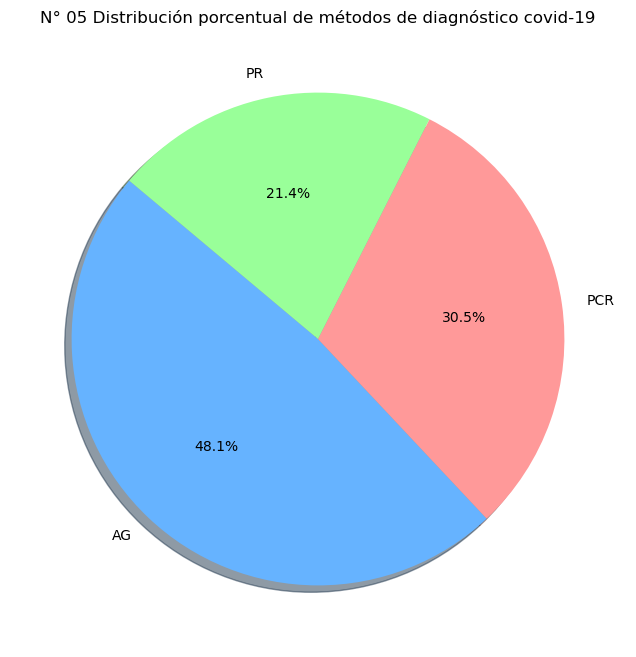

In [45]:
conteo_metodox = basedat['METODODX'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(conteo_metodox, 
        labels=conteo_metodox.index, 
        autopct='%1.1f%%', 
        startangle=140,
        shadow=True,
        colors=['#66b3ff','#ff9999','#99ff99'])

plt.title('N° 05 Distribución porcentual de métodos de diagnóstico covid-19')

plt.show()


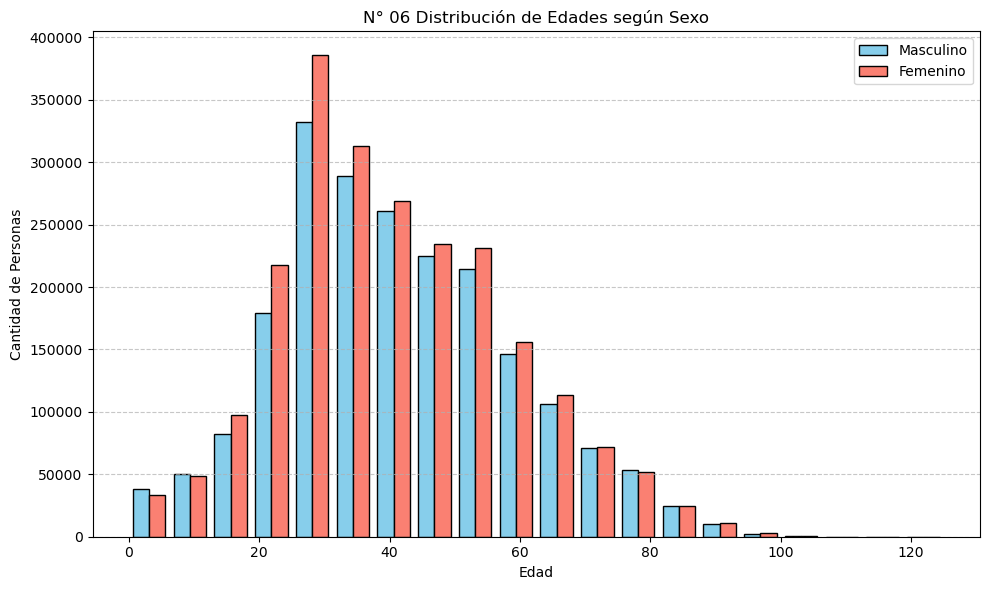

In [46]:
edad_hombres = basedat[basedat['SEXO'] == 'MASCULINO']['EDAD']
edad_mujeres = basedat[basedat['SEXO'] == 'FEMENINO']['EDAD']

plt.figure(figsize=(10, 6))

plt.hist([edad_hombres, edad_mujeres],
         bins=20,
         label=['Masculino', 'Femenino'],
         color=['skyblue', 'salmon'],
         edgecolor='black')

plt.xlabel('Edad')
plt.ylabel('Cantidad de Personas')
plt.title('N° 06 Distribución de Edades según Sexo')
plt.legend()

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


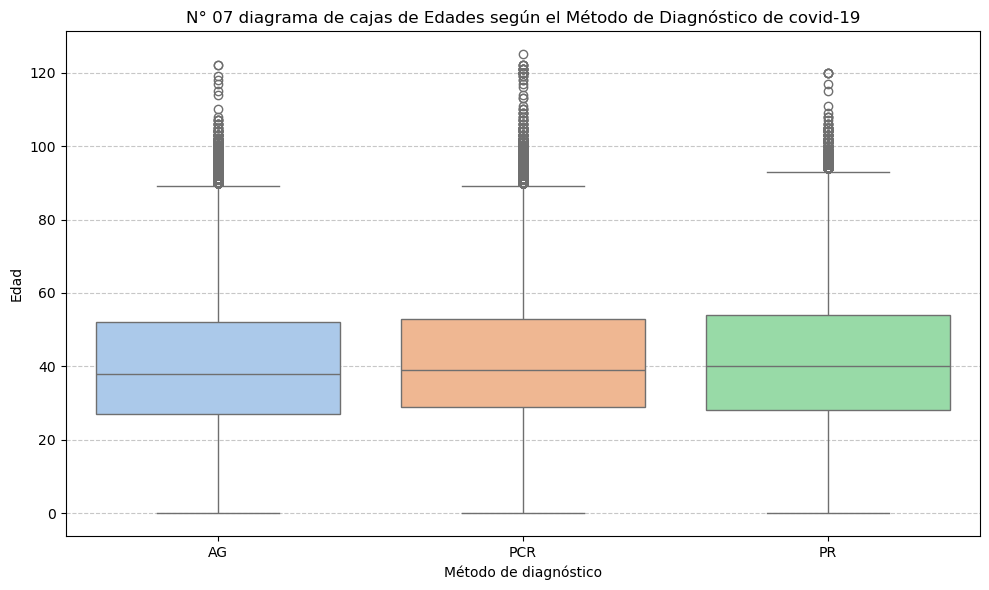

In [47]:
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.boxplot(x='METODODX', y='EDAD', data=basedat, hue='METODODX', palette='pastel', legend=False)

plt.title('N° 07 diagrama de cajas de Edades según el Método de Diagnóstico de covid-19')
plt.xlabel('Método de diagnóstico')
plt.ylabel('Edad')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

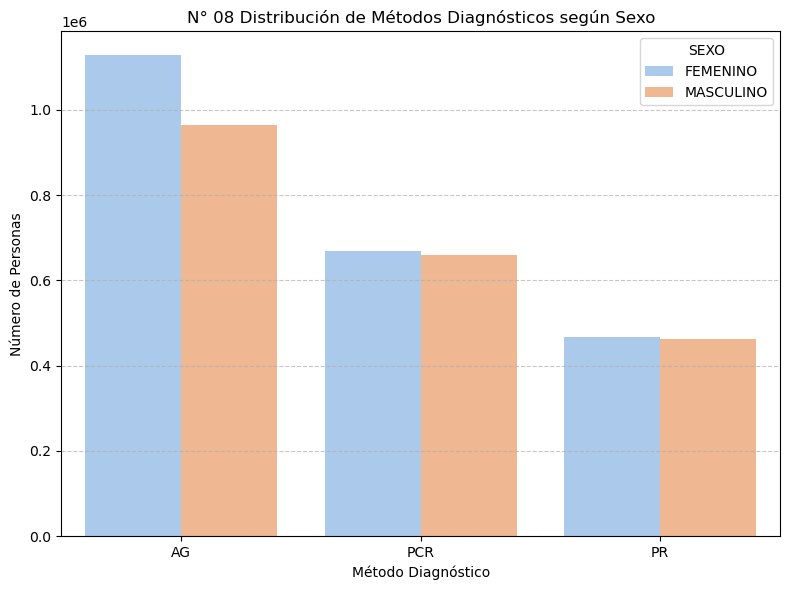

In [49]:
conteo = basedat.groupby(['METODODX', 'SEXO']).size().reset_index(name='CANTIDAD')

plt.figure(figsize=(8,6))
sns.barplot(x='METODODX', y='CANTIDAD', hue='SEXO', data=conteo, palette='pastel')

plt.title('N° 08 Distribución de Métodos Diagnósticos según Sexo')
plt.xlabel('Método Diagnóstico')
plt.ylabel('Número de Personas')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [50]:
basedat.to_csv('base_limpia.csv', index = False)